<a href="https://colab.research.google.com/github/mvgarcia/GarciaValentina_RECV_Entrega4/blob/main/GarciaValentina_RECV_Entrega4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#--- Cargamos el paquete torch y otras utilidades
import torch
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores
import torch.utils.data as Data

import numpy as np
import pandas as pd

#--- Cargamos los datos
data = pd.read_csv('/content/MLP_regresion.csv')

x = np.array(data['X'])
y = np.array(data['Y'])

print(data.head(5))

np.shape(x), np.shape(y)

          X         Y
0 -10.00000  0.929135
1  -9.97998  0.634406
2  -9.95996  0.946741
3  -9.93994  0.578634
4  -9.91992  0.721276


((1000,), (1000,))

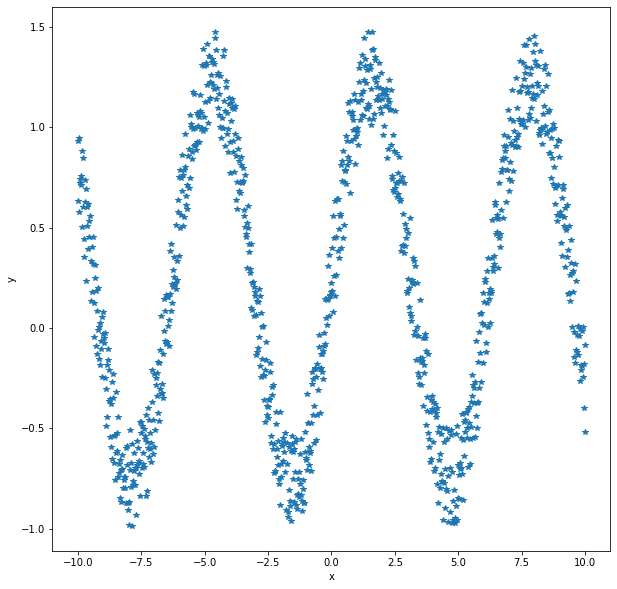

In [6]:
#--- Visualizamos los datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
#--- Convertimos los numpy a tensores

X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

# Modelo 1

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=1, bias=True)
)
Epoch: [1/1], loss: 0.5236523151397705


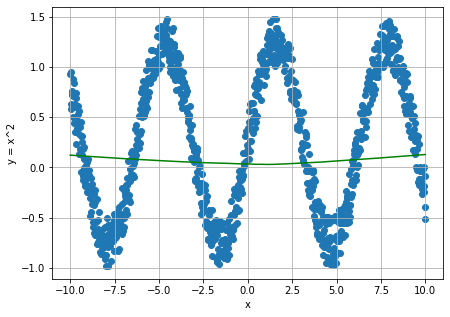

Epoch: [1/51], loss: 0.3881120979785919


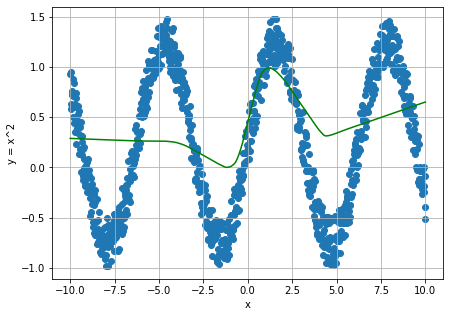

Epoch: [1/101], loss: 0.30363741517066956


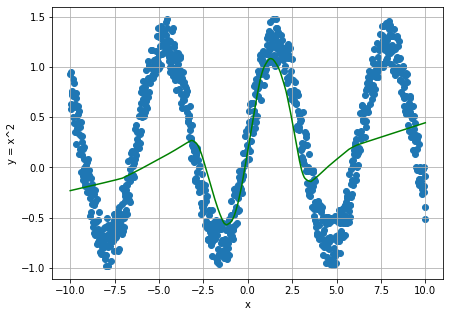

Epoch: [1/151], loss: 0.22557656466960907


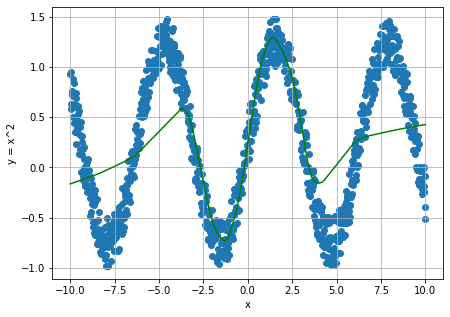

Epoch: [1/201], loss: 0.2281915545463562


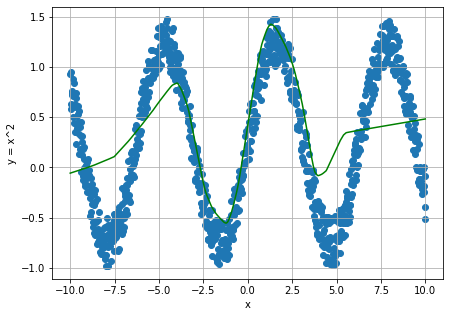

Epoch: [1/251], loss: 0.21108196675777435


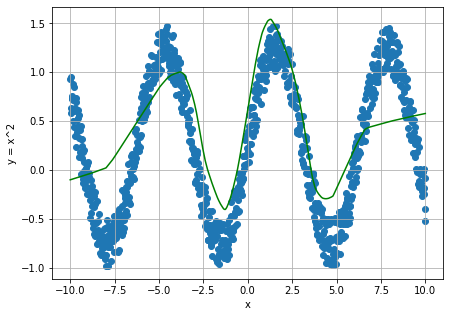

Epoch: [1/301], loss: 0.3020349144935608


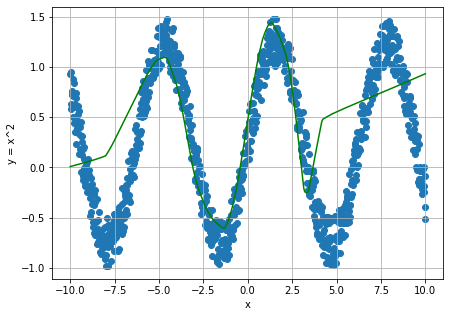

Epoch: [1/351], loss: 0.2259587198495865


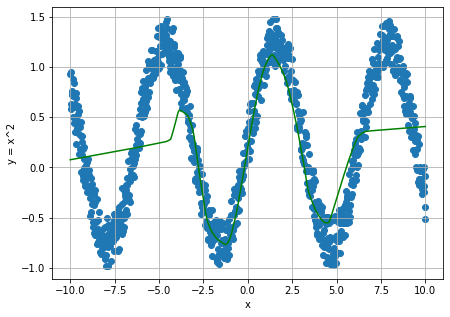

Epoch: [1/401], loss: 0.19183385372161865


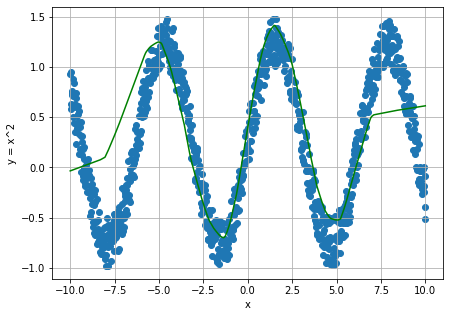

Epoch: [1/451], loss: 0.1409894973039627


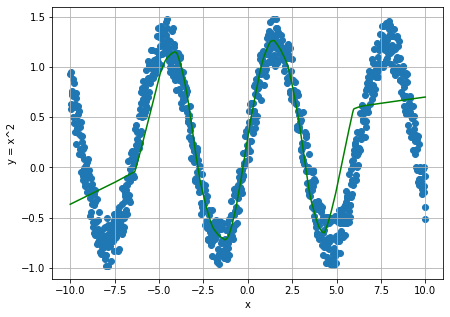

Epoch: [1/501], loss: 0.14196835458278656


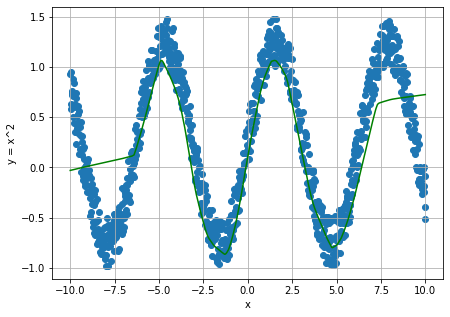

Epoch: [1/551], loss: 0.1383616328239441


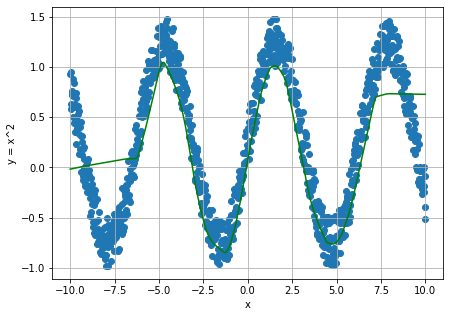

Epoch: [1/601], loss: 0.12587416172027588


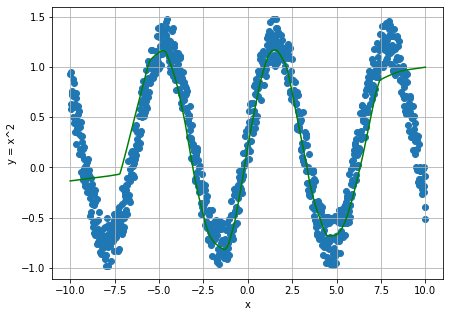

Epoch: [1/651], loss: 0.22641794383525848


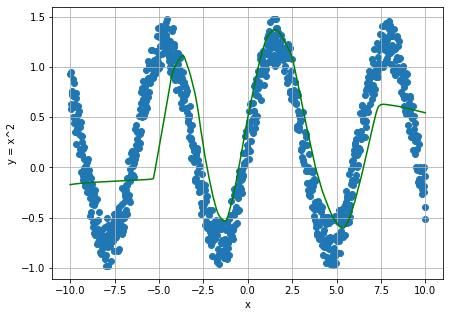

Epoch: [1/701], loss: 0.12143564969301224


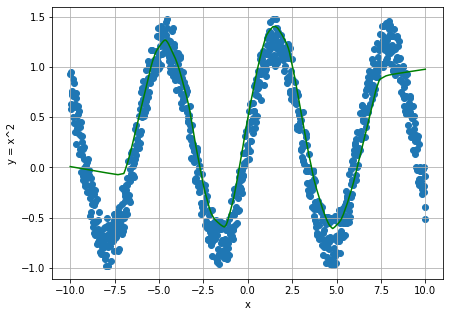

Epoch: [1/751], loss: 0.13584840297698975


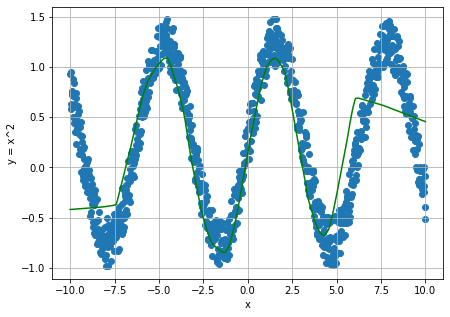

Epoch: [1/801], loss: 0.1335015594959259


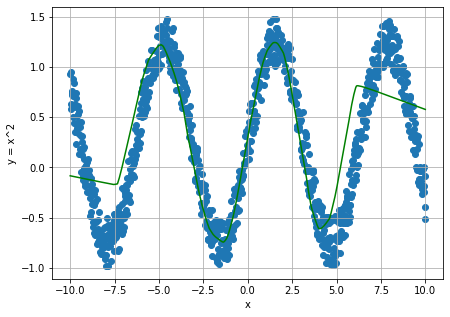

Epoch: [1/851], loss: 0.13674266636371613


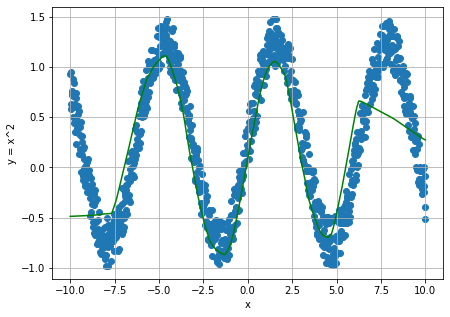

Epoch: [1/901], loss: 0.14276927709579468


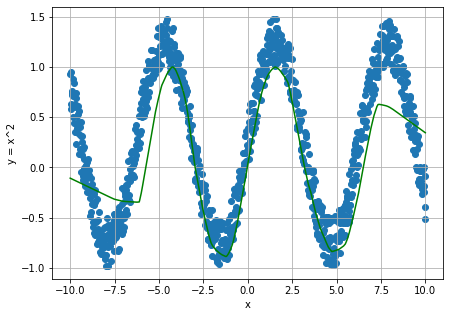

Epoch: [1/951], loss: 0.11773280799388885


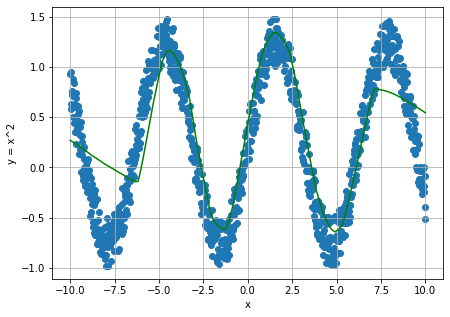

Epoch: [1/1001], loss: 0.13250988721847534


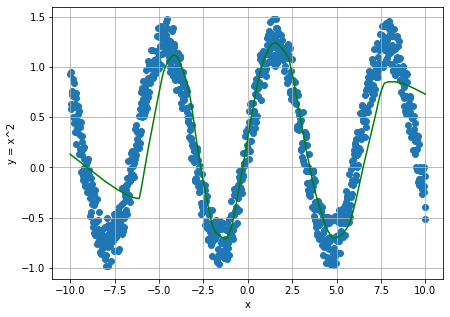

Epoch: [1/1051], loss: 0.09053116291761398


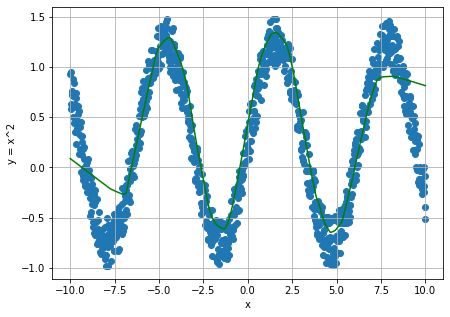

Epoch: [1/1101], loss: 0.11156065762042999


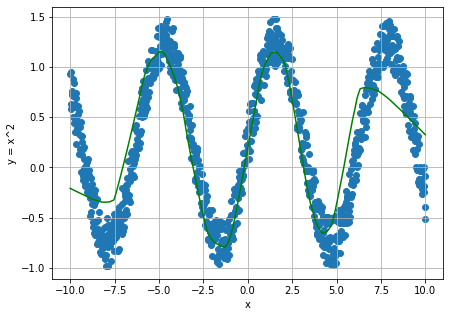

In [63]:
#--- Definimos la ANN-1
input_dim = 1
model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, input_dim),
  )
print(model)

#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

#-- Definimos el número de épocas
n_epoch = 1100
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

# Modelo 2

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=400, bias=True)
  (3): ReLU()
  (4): Linear(in_features=400, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=1, bias=True)
)
Epoch: [1/1], loss: 0.603506326675415


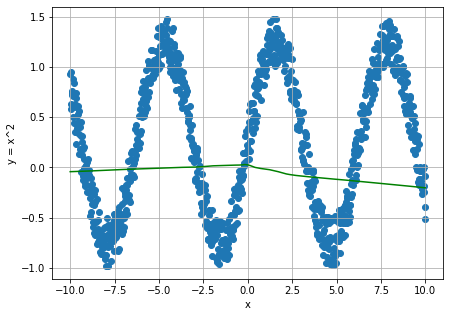

Epoch: [1/51], loss: 0.439836710691452


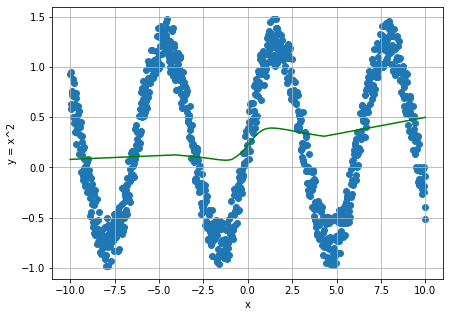

Epoch: [1/101], loss: 0.36946558952331543


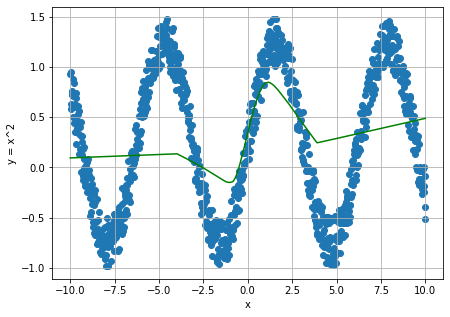

Epoch: [1/151], loss: 0.30993983149528503


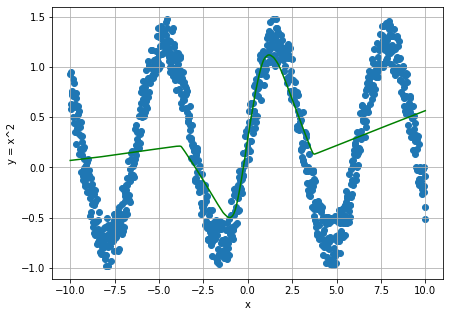

Epoch: [1/201], loss: 0.2813488245010376


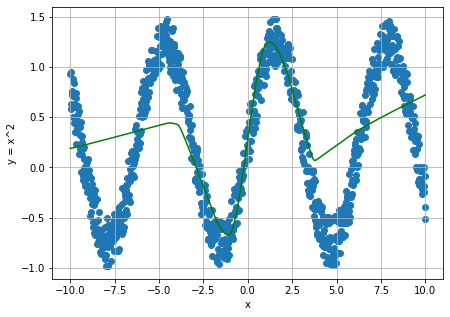

Epoch: [1/251], loss: 0.2847343981266022


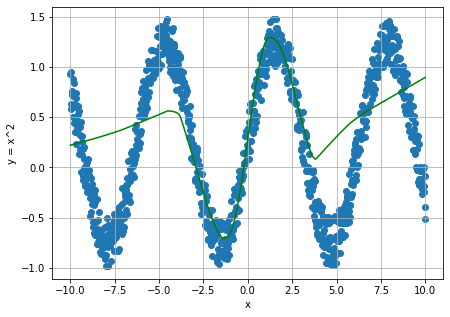

Epoch: [1/301], loss: 0.22912535071372986


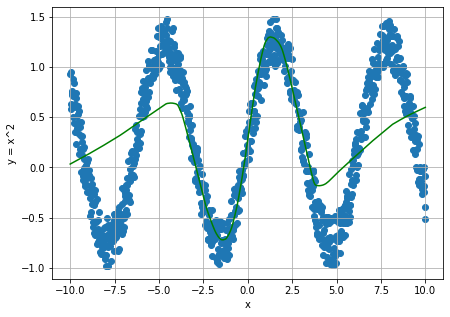

Epoch: [1/351], loss: 0.2453877031803131


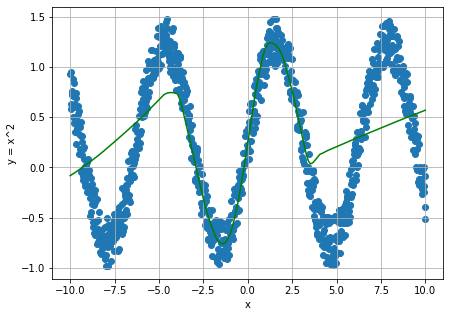

Epoch: [1/401], loss: 0.2267899513244629


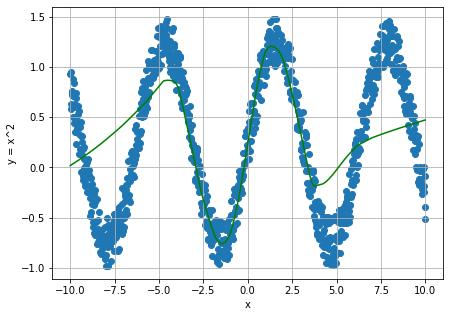

Epoch: [1/451], loss: 0.2519162893295288


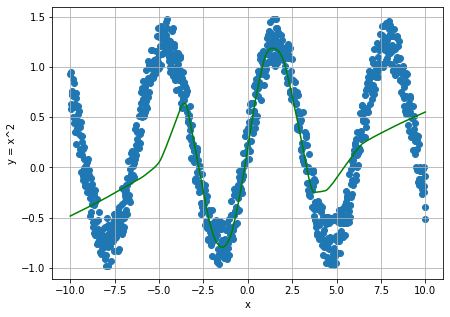

Epoch: [1/501], loss: 0.20190800726413727


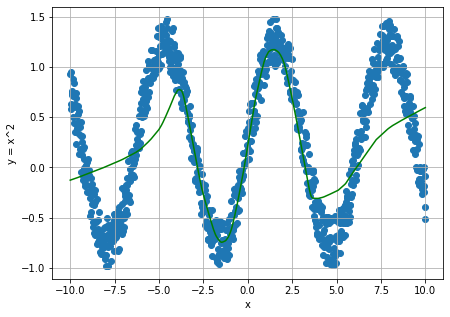

Epoch: [1/551], loss: 0.22786860167980194


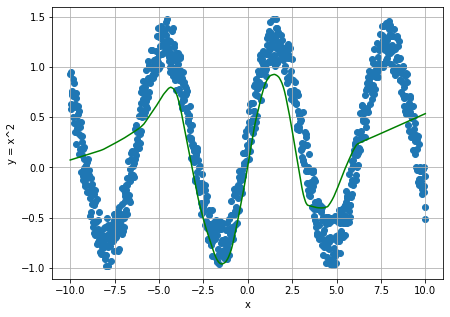

Epoch: [1/601], loss: 0.2808426320552826


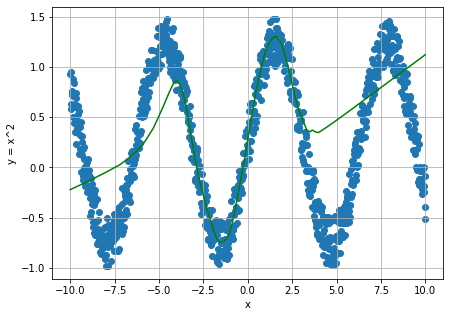

Epoch: [1/651], loss: 0.2931835353374481


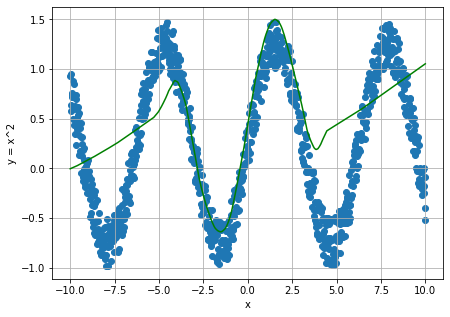

Epoch: [1/701], loss: 0.1642640084028244


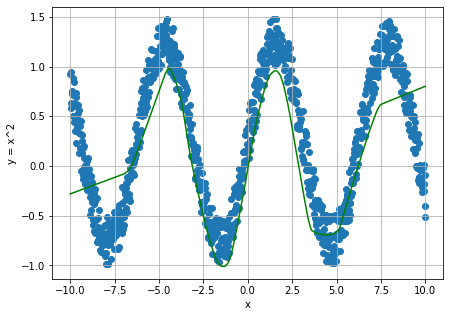

Epoch: [1/751], loss: 0.21294255554676056


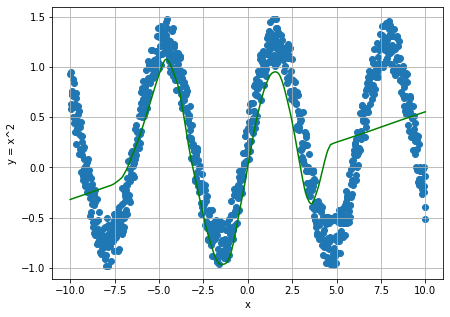

Epoch: [1/801], loss: 0.13751402497291565


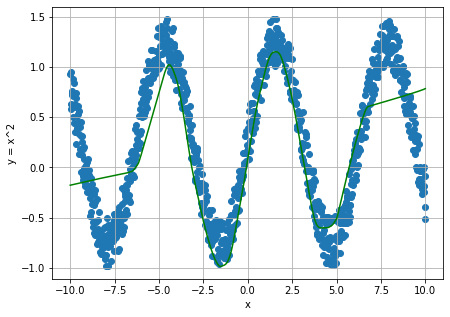

Epoch: [1/851], loss: 0.17191635072231293


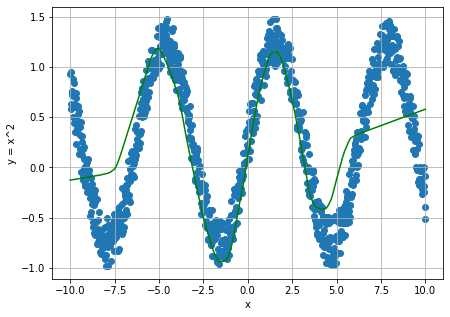

Epoch: [1/901], loss: 0.15914008021354675


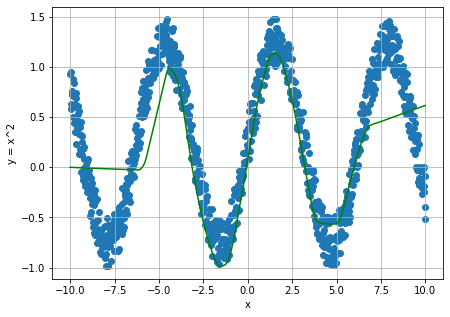

Epoch: [1/951], loss: 0.13245975971221924


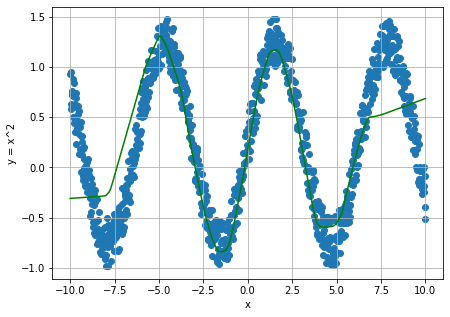

Epoch: [1/1001], loss: 0.1010800451040268


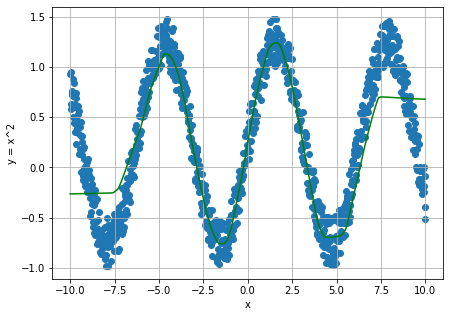

Epoch: [1/1051], loss: 0.1155494749546051


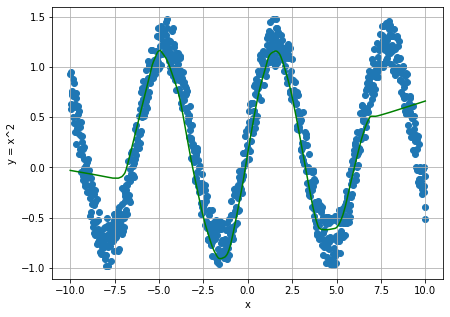

Epoch: [1/1101], loss: 0.09585870057344437


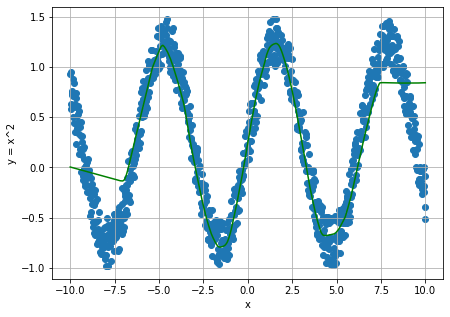

Epoch: [1/1151], loss: 0.1246149018406868


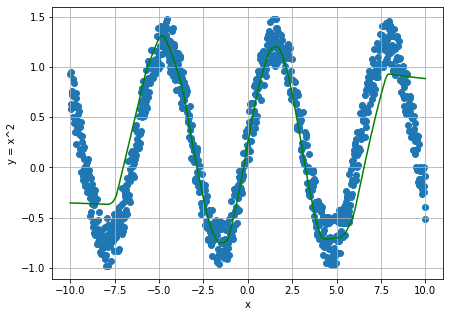

Epoch: [1/1201], loss: 0.12905673682689667


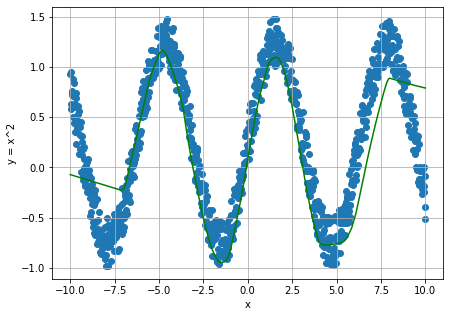

Epoch: [1/1251], loss: 0.10697855800390244


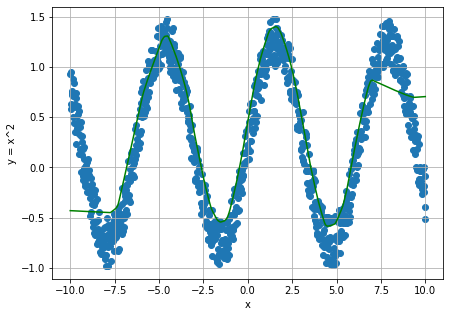

Epoch: [1/1301], loss: 0.1012997180223465


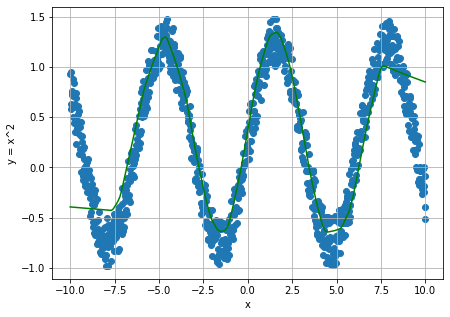

Epoch: [1/1351], loss: 0.1327521651983261


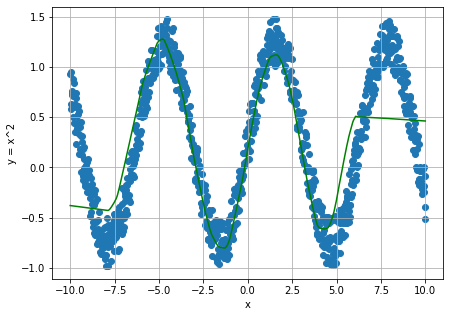

Epoch: [1/1401], loss: 0.09595007449388504


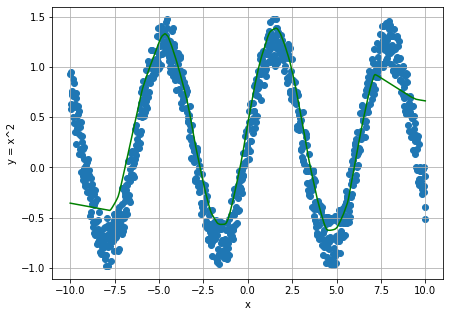

Epoch: [1/1451], loss: 0.10663812607526779


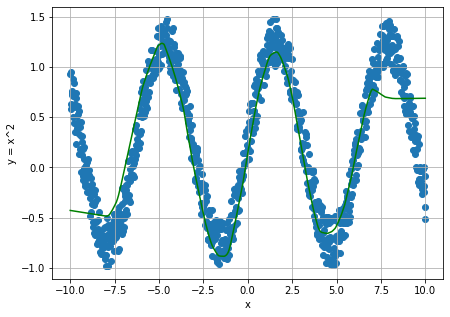

Epoch: [1/1501], loss: 0.11708850413560867


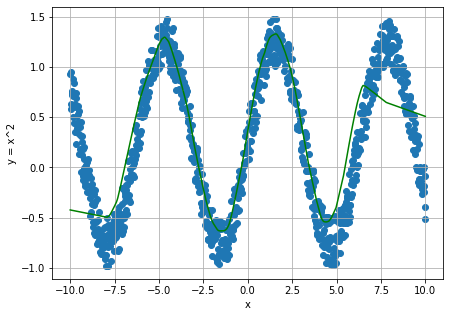

Epoch: [1/1551], loss: 0.09953147917985916


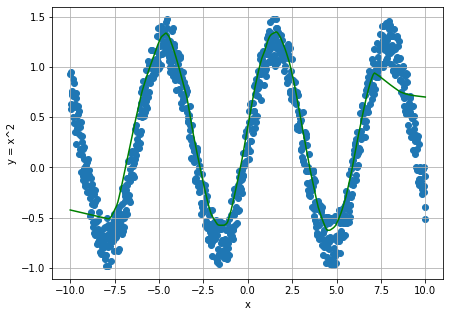

Epoch: [1/1601], loss: 0.1217145249247551


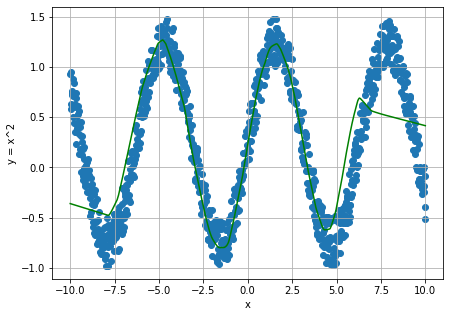

Epoch: [1/1651], loss: 0.09685634076595306


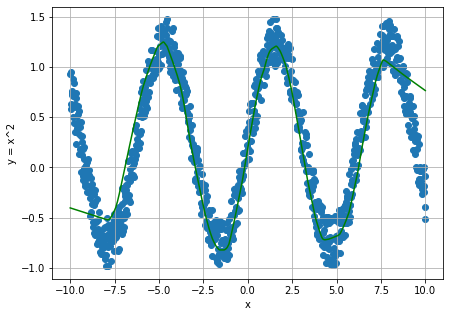

Epoch: [1/1701], loss: 0.09041428565979004


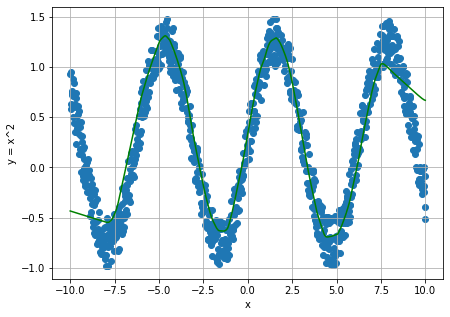

Epoch: [1/1751], loss: 0.09187379479408264


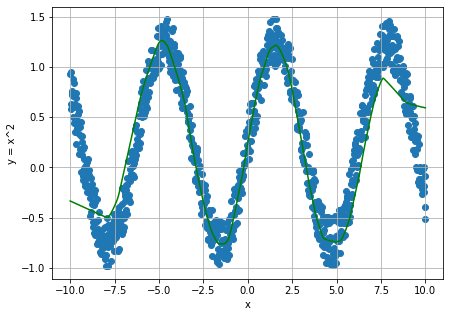

Epoch: [1/1801], loss: 0.09172032028436661


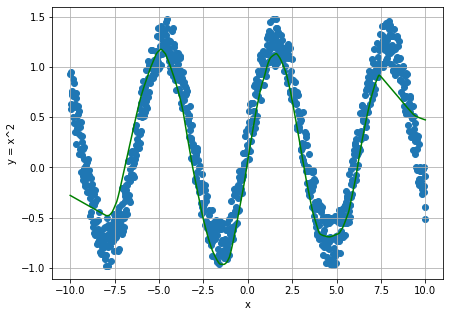

Epoch: [1/1851], loss: 0.08955620974302292


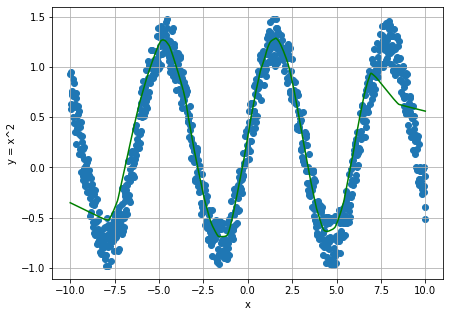

Epoch: [1/1901], loss: 0.12935058772563934


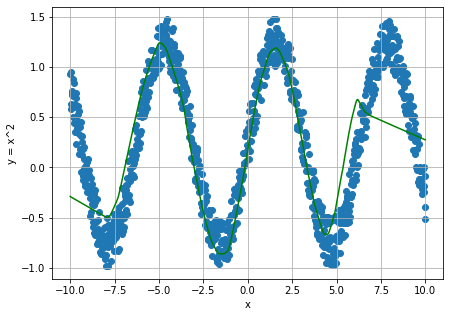

Epoch: [1/1951], loss: 0.14917324483394623


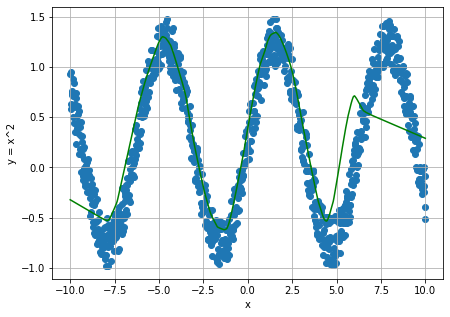

Epoch: [1/2001], loss: 0.08992421627044678


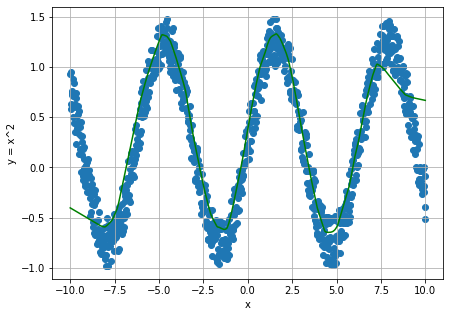

Epoch: [1/2051], loss: 0.09016398340463638


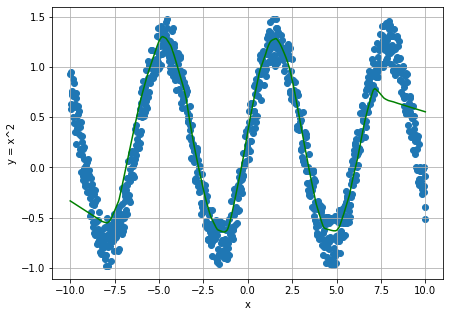

Epoch: [1/2101], loss: 0.09957639127969742


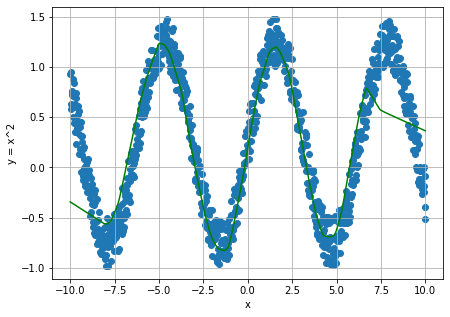

In [66]:
#--- Definimos la ANN-1
input_dim = 1
model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, 300),
  torch.nn.ReLU(),
  torch.nn.Linear(300, 400),
  torch.nn.ReLU(),
  torch.nn.Linear(400, 200),
  torch.nn.ReLU(),
  torch.nn.Linear(200, input_dim),
  )
print(model)

#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

#-- Definimos el número de épocas
n_epoch = 2100
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

Modelo 1:

Capas: 5

Neuronas por capa: (in, out): (1,100),(100,100),(100,100),(100,100),(100,1)

Learning rate: 0.2

Epocas: 1100

Modelo 2:

Capas: 4

Neuronas por capa: (in, out): (1,300),(300,400),(400,200),(200,1)

Learning rate: 0.05

Epocas: 2100

El modelo que arroja mejores resultados es el Modelo 1 pues requiere menos neuronas por capa y menos épocas para lograr resultados óptimos, por lo que es un mejor algoritmo dado que requiere menos recursos computacionales.

Si le dejamos el mismo número de épocas a ambos Modelos (celda de abajo), el modelo 1 tiene un loss menor (M1:0.06 vs M2:0.08), lo que confirma que da mejores resultados.

Esto se puede deber a que, al tener más capas, hay más corrección de los resultados de capas anteriores por lo que se logra un resultado óptimo más rápido

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=1, bias=True)
)
Epoch: [1/1], loss: 0.555148720741272


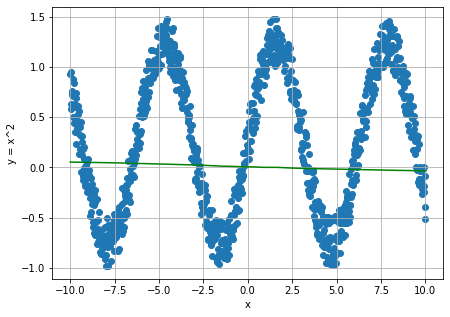

Epoch: [1/51], loss: 0.3767189085483551


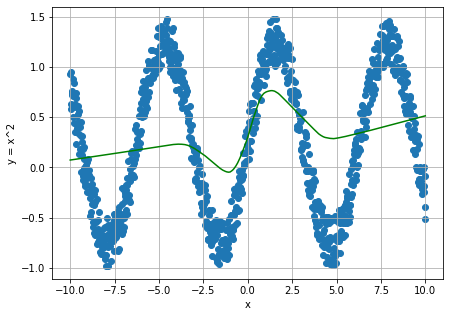

Epoch: [1/101], loss: 0.27345776557922363


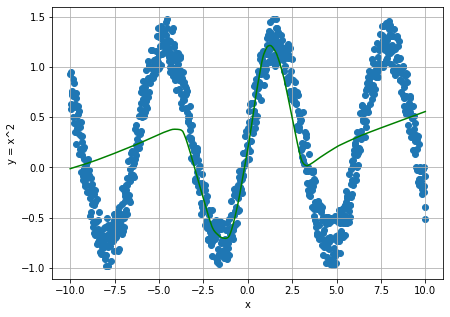

Epoch: [1/151], loss: 0.39317798614501953


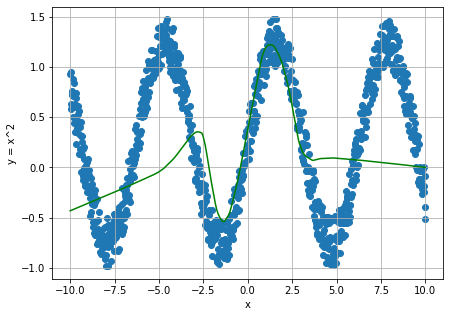

Epoch: [1/201], loss: 0.20903652906417847


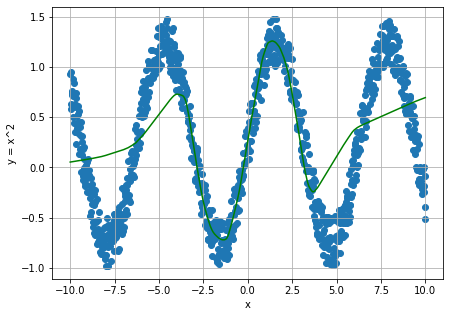

Epoch: [1/251], loss: 0.31485381722450256


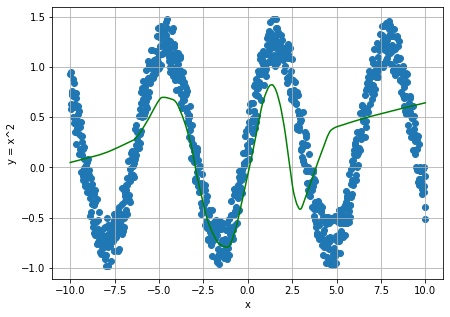

Epoch: [1/301], loss: 0.2033044695854187


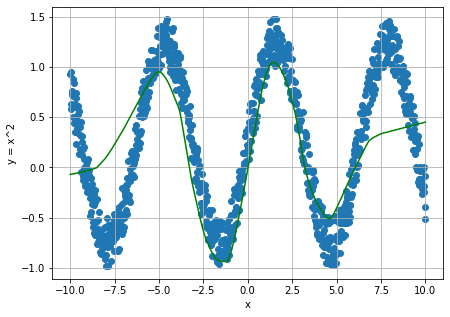

Epoch: [1/351], loss: 0.15719741582870483


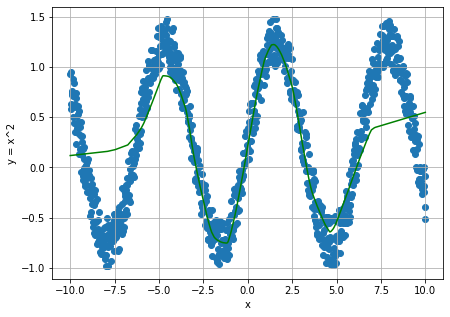

Epoch: [1/401], loss: 0.2455757111310959


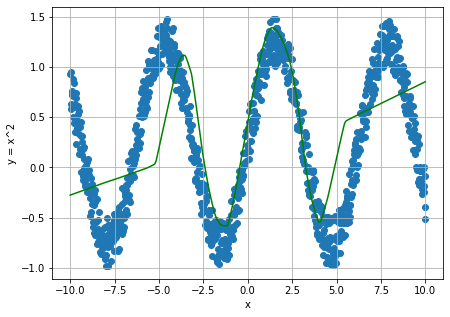

Epoch: [1/451], loss: 0.13783322274684906


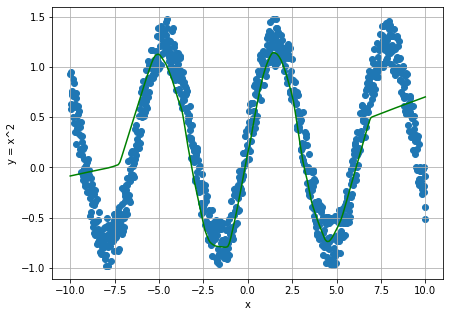

Epoch: [1/501], loss: 0.15047019720077515


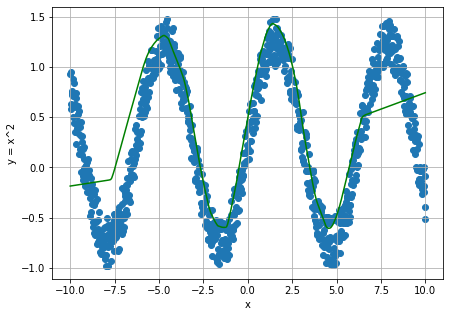

Epoch: [1/551], loss: 0.23843914270401


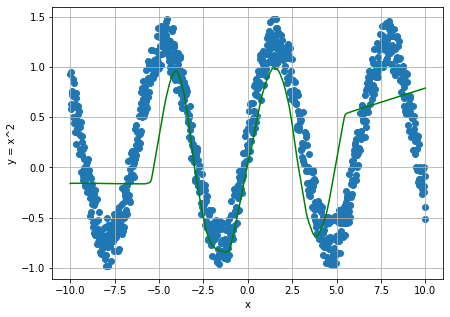

Epoch: [1/601], loss: 0.251847505569458


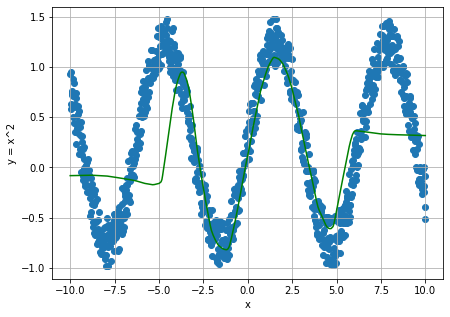

Epoch: [1/651], loss: 0.10595062375068665


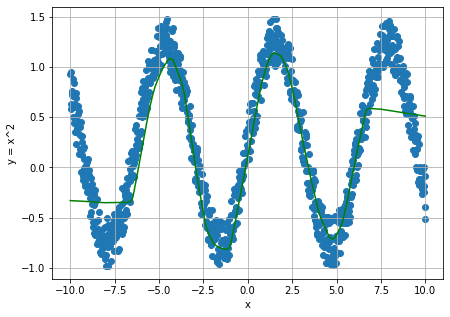

Epoch: [1/701], loss: 0.11147353798151016


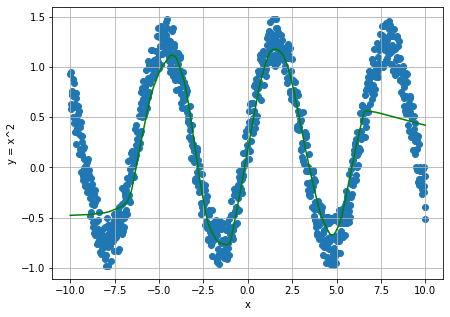

Epoch: [1/751], loss: 0.12800006568431854


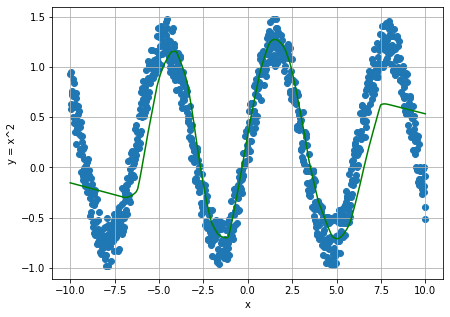

Epoch: [1/801], loss: 0.15440009534358978


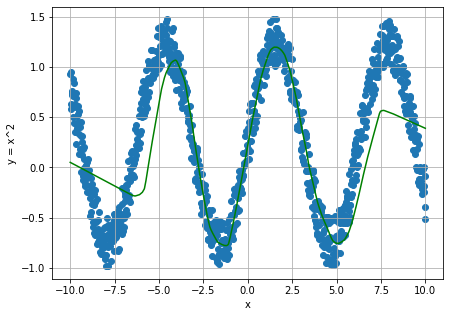

Epoch: [1/851], loss: 0.13281050324440002


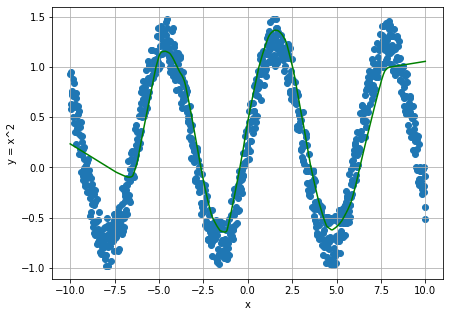

Epoch: [1/901], loss: 0.1382058709859848


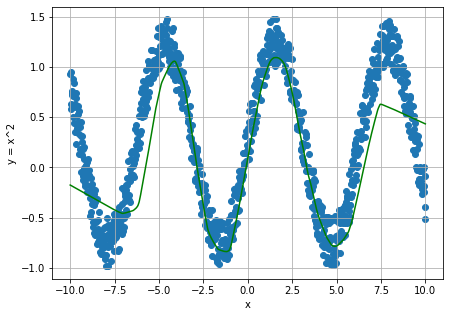

Epoch: [1/951], loss: 0.20982614159584045


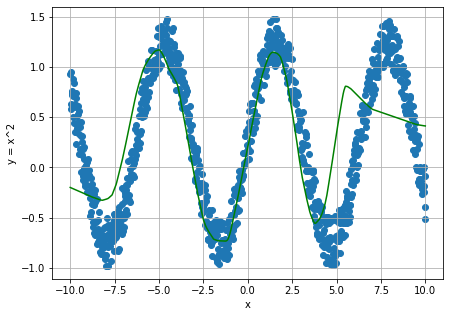

Epoch: [1/1001], loss: 0.12359122186899185


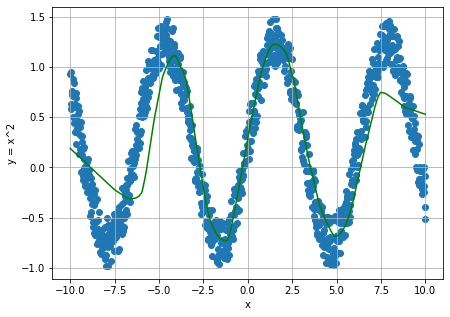

Epoch: [1/1051], loss: 0.13416776061058044


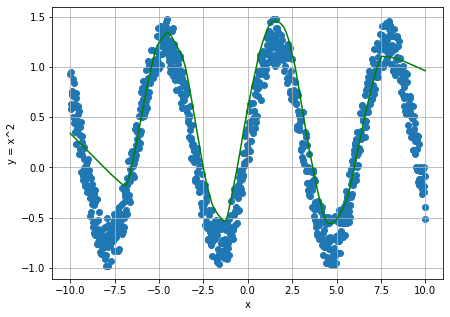

Epoch: [1/1101], loss: 0.10436725616455078


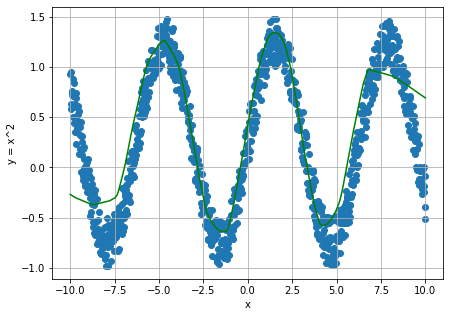

Epoch: [1/1151], loss: 0.12903447449207306


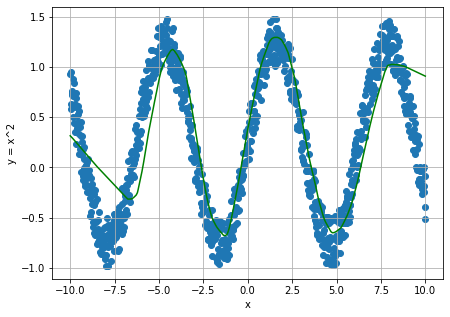

Epoch: [1/1201], loss: 0.09419216215610504


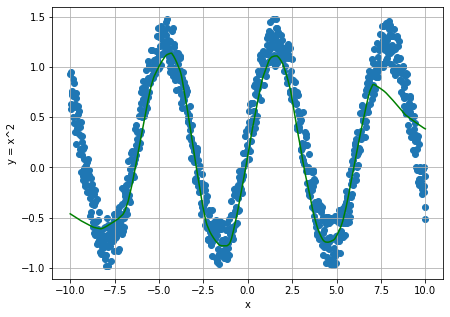

Epoch: [1/1251], loss: 0.09315276145935059


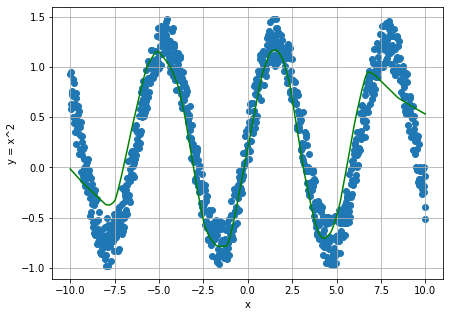

Epoch: [1/1301], loss: 0.1050911471247673


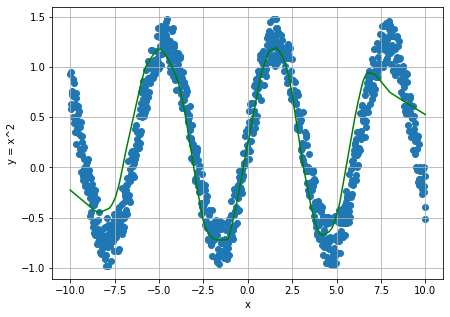

Epoch: [1/1351], loss: 0.1240675076842308


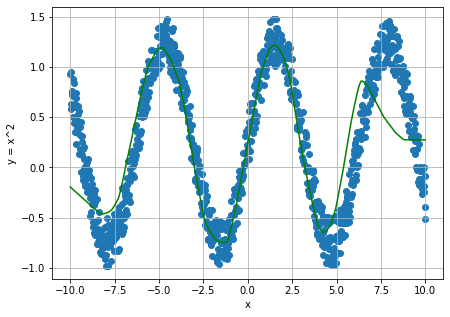

Epoch: [1/1401], loss: 0.10871148854494095


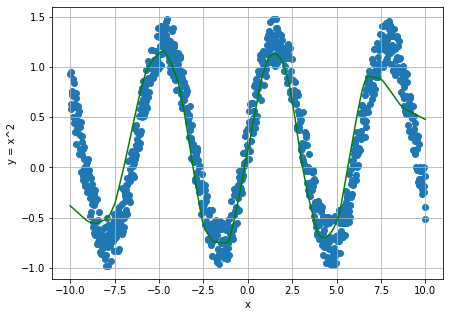

Epoch: [1/1451], loss: 0.0815877765417099


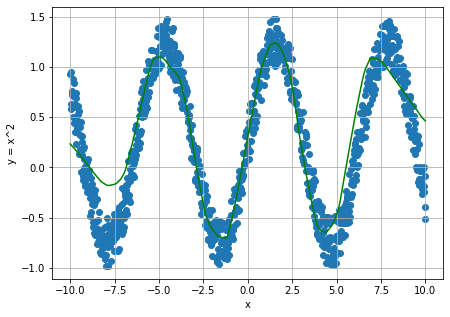

Epoch: [1/1501], loss: 0.0625900998711586


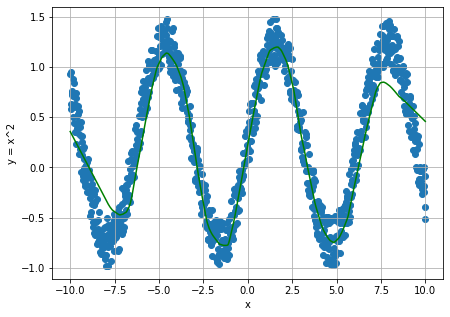

Epoch: [1/1551], loss: 0.1101389154791832


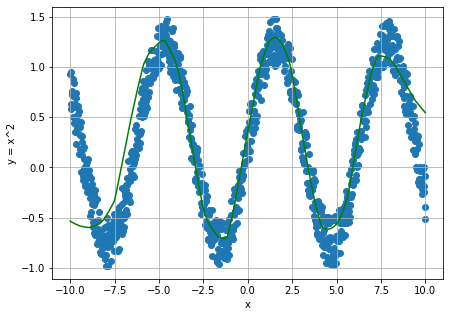

Epoch: [1/1601], loss: 0.11905461549758911


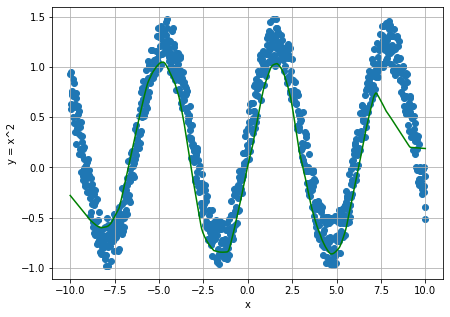

Epoch: [1/1651], loss: 0.07413171231746674


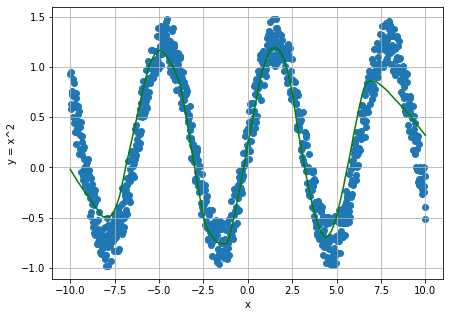

Epoch: [1/1701], loss: 0.09681178629398346


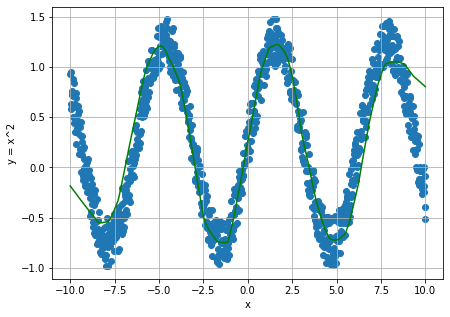

Epoch: [1/1751], loss: 0.10010503977537155


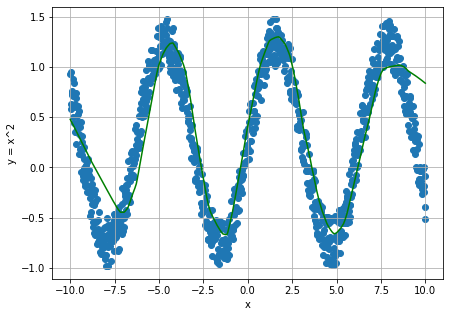

Epoch: [1/1801], loss: 0.10066763311624527


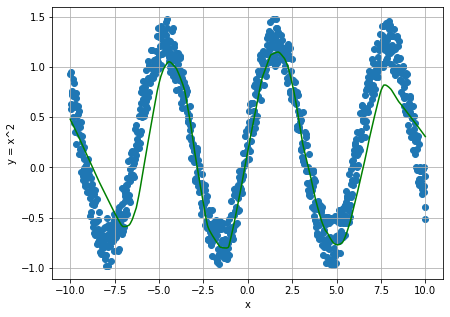

Epoch: [1/1851], loss: 0.10413634777069092


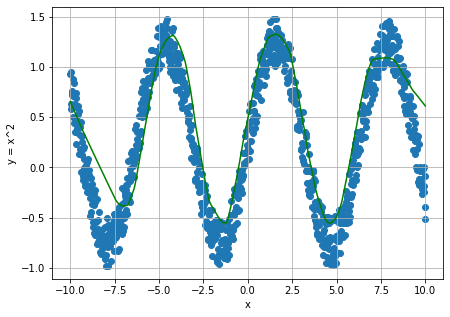

Epoch: [1/1901], loss: 0.06445515900850296


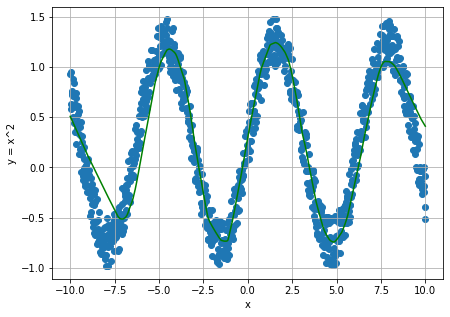

Epoch: [1/1951], loss: 0.08470506221055984


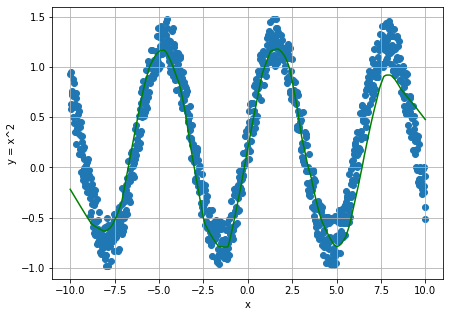

Epoch: [1/2001], loss: 0.15154017508029938


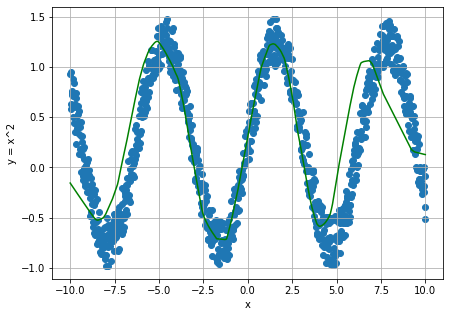

Epoch: [1/2051], loss: 0.07957859337329865


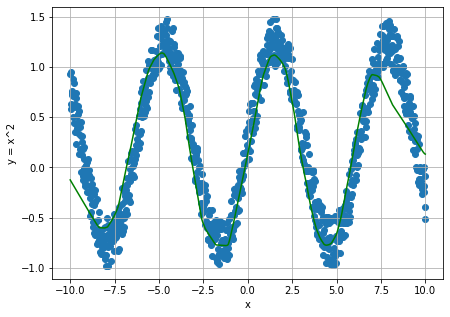

Epoch: [1/2101], loss: 0.08928018808364868


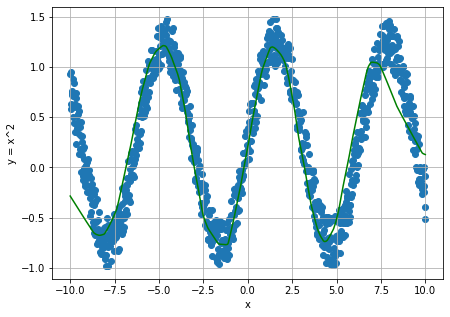

In [65]:
#--- Definimos la ANN-1
input_dim = 1
model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, input_dim),
  )
print(model)

#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

#-- Definimos el número de épocas
n_epoch = 2100
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()